<a href="https://colab.research.google.com/github/bagusamandira/Neural-Network/blob/main/Dense-Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Raden Mas Bagus Mahesa Amandira**

**NIM: 2502033986**

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
tf.random.set_seed(42)

# Data Preprocessing

In [ ]:
df = pd.read_csv('/content/dataset_spine.csv')
df.head()

,Unnamed: 0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


Check if there are any data with empty values

In [ ]:
len(df)

310

In [ ]:
df.isna().sum()

Unnamed: 0    0
Col1          0
Col2          0
Col3          0
Col4          0
Col5          0
Col6          0
Col7          0
Col8          0
Col9          0
Col10         0
Col11         0
Col12         0
Class_att     0
dtype: int64

In [ ]:
df = df.drop(columns='Unnamed: 0')
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


Split data into target and predictor variables, where Class_att is the target and the other variables are the predictor

In [ ]:
x = df.drop(columns='Class_att')
y = y = df['Class_att']

Since this is a classification dataset, we can change the classification from string into 0 and 1 using a label encoder

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
y.sum()

100

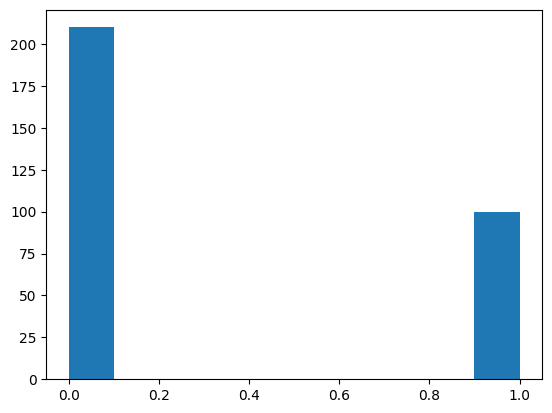

In [ ]:
plt.hist(y)
plt.show()

We can see here that the data is unbalanced. There are more 0's than 1's. This may be a problem later when we try modeling. This is also a sign that the F1-score will be more important than the accuracy

# Train, test, and validation split
(80% train, 10% test, and 10% validation)

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y, train_size=0.8)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, train_size=0.5)

#Benchmark Architecture

In [ ]:
#Architecture

model = Sequential()
#Input layer
model.add(Dense(units = 12, activation = 'relu', input_shape = (x_train.shape[1],)))
#Hidden layer
model.add(Dense(units = 512, activation = 'sigmoid'))
model.add(Dense(units = 256, activation = 'sigmoid'))
model.add(Dense(units = 128, activation = 'sigmoid'))
#Output layer
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 12)                156       
                                                                 
 dense_24 (Dense)            (None, 512)               6656      
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 2)                 258       
                                                                 
Total params: 171294 (669.12 KB)
Trainable params: 171294 (669.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
history = model.fit(x_train, y_train, epochs = 100, validation_data=(x_val, y_val), batch_size=32)

Epoch 1/100
8/8 [==============================] - 1s 40ms/step - loss: 0.6281 - accuracy: 0.6371 - val_loss: 0.6112 - val_accuracy: 0.5484
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.5343 - accuracy: 0.6895 - val_loss: 0.6094 - val_accuracy: 0.5484
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4892 - accuracy: 0.7056 - val_loss: 0.3984 - val_accuracy: 0.7742
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.4626 - accuracy: 0.7298 - val_loss: 0.3614 - val_accuracy: 0.8387
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4538 - accuracy: 0.7379 - val_loss: 0.4711 - val_accuracy: 0.6129
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4270 - accuracy: 0.7581 - val_loss: 0.3526 - val_accuracy: 0.8387
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4093 - accuracy: 0.7661 - val_loss: 0.3470 - val_accuracy: 0.8710
Epoch 8/100
8/8 [=====

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("test loss  :", test_loss)
print("test acc   :", test_accuracy)

1/1 [==============================] - 0s 26ms/step - loss: 0.7735 - accuracy: 0.7419
test loss  : 0.7734924554824829
test acc   : 0.7419354915618896


In [ ]:
hist_dict = history.history

train_loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

In [ ]:
epochs = range(1, len(train_loss)+1)

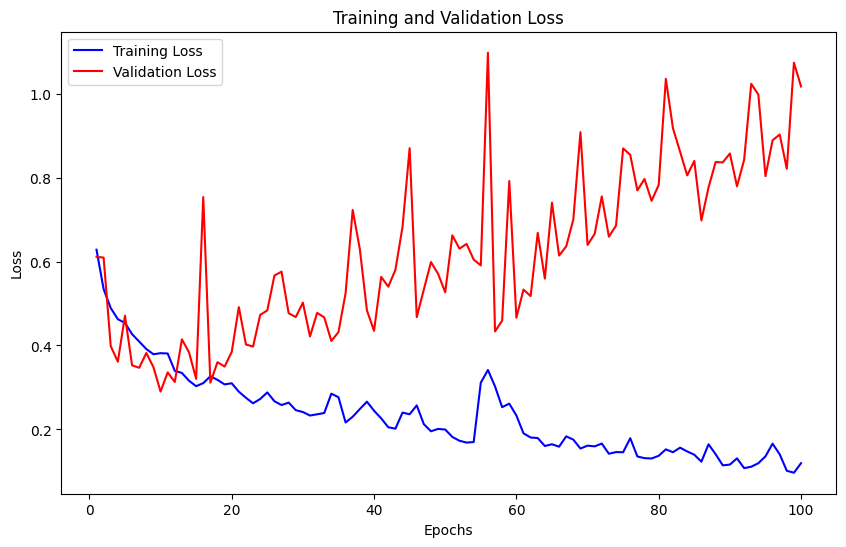

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Classification Report

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

1/1 [==============================] - 0s 71ms/step
[[18  3]
 [ 5  5]]

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.62      0.50      0.56        10

    accuracy                           0.74        31
   macro avg       0.70      0.68      0.69        31
weighted avg       0.73      0.74      0.73        31




Since we have an unbalanced data, the F1 score is more important than the accuracy. Here the F1 score for label 1 is 0.56 which means that our model is not adequate.

# MODEL 2
Menggunakan Adam optimizer

In [ ]:
model2 = Sequential()

#Input layer
model2.add(Dense(units = 12, activation = 'relu', input_shape = (x_train.shape[1],)))
#Hidden layer
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(units = 256, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(units = 512, activation = 'relu'))
model2.add(Dropout(0.5))
#Output layer
model2.add(Dense(units=2, activation='softmax'))

Source: https://www.pluralsight.com/guides/convolutional-neural-network-in-keras

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 12)                156       
                                                                 
 dense_18 (Dense)            (None, 64)                832       
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               33024     
                                                                 
 dropout_10 (Dropout)        (None, 256)              

In [ ]:
model2.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
history2 = []

In [ ]:
history2 = model2.fit(x_train, y_train, epochs = 100, validation_data=(x_val, y_val), batch_size=32)

Epoch 1/100
8/8 [==============================] - 3s 89ms/step - loss: 7.3490 - accuracy: 0.5403 - val_loss: 2.3993 - val_accuracy: 0.8065
Epoch 2/100
8/8 [==============================] - 0s 20ms/step - loss: 5.5451 - accuracy: 0.5847 - val_loss: 0.5559 - val_accuracy: 0.6774
Epoch 3/100
8/8 [==============================] - 0s 19ms/step - loss: 4.6659 - accuracy: 0.5484 - val_loss: 0.7028 - val_accuracy: 0.8065
Epoch 4/100
8/8 [==============================] - 0s 19ms/step - loss: 3.3452 - accuracy: 0.6008 - val_loss: 0.4826 - val_accuracy: 0.8065
Epoch 5/100
8/8 [==============================] - 0s 19ms/step - loss: 2.6018 - accuracy: 0.5927 - val_loss: 0.4195 - val_accuracy: 0.8065
Epoch 6/100
8/8 [==============================] - 0s 22ms/step - loss: 2.6354 - accuracy: 0.5927 - val_loss: 0.4053 - val_accuracy: 0.8065
Epoch 7/100
8/8 [==============================] - 0s 18ms/step - loss: 1.9859 - accuracy: 0.6008 - val_loss: 0.3834 - val_accuracy: 0.8387
Epoch 8/100
8/8 [===

In [ ]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print("test loss  :", test_loss2)
print("test acc   :", test_accuracy2)

1/1 [==============================] - 0s 29ms/step - loss: 0.3640 - accuracy: 0.8387
test loss  : 0.364003449678421
test acc   : 0.8387096524238586


In [ ]:
hist_dict2 = history2.history

train_loss2 = hist_dict2['loss']
val_loss2 = hist_dict2['val_loss']
epochs2 = range(1, len(train_loss2)+1)

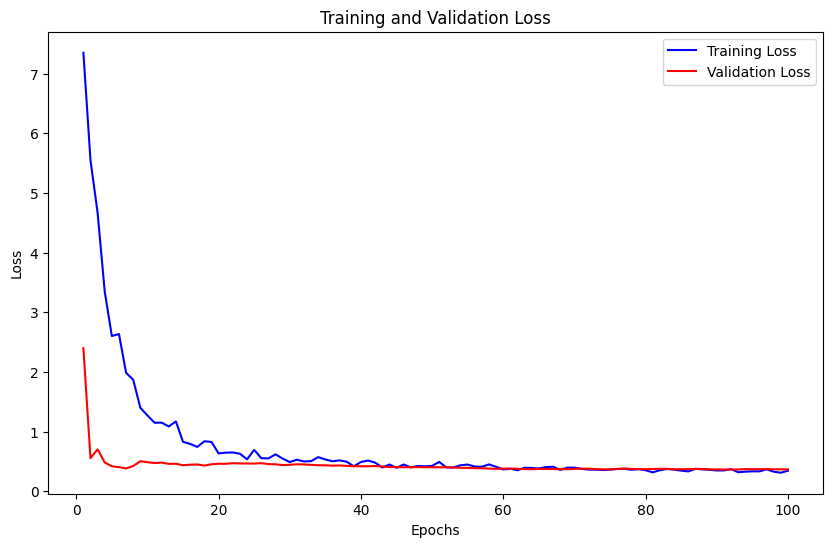

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(epochs2, train_loss2, 'b-', label='Training Loss')
plt.plot(epochs2, val_loss2, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
pred2 = model2.predict(x_test)
pred2 = np.argmax(pred2, axis=1)
print(confusion_matrix(y_test, pred2))
print()
print(classification_report(y_test, pred2))

1/1 [==============================] - 0s 82ms/step
[[15  4]
 [ 1 11]]

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.73      0.92      0.81        12

    accuracy                           0.84        31
   macro avg       0.84      0.85      0.84        31
weighted avg       0.86      0.84      0.84        31



We have improved the F1 score of label 1 from 0.56 to 0.81 by changing the activation to relU, adding one more hidden layer, and changing the order of the neural network.

# Creating a new architecture with custom optimizer


Mennggunakan optimizer custom untuk mencoba mendapatkan hasiil lebih baik dari Adam Optimizer

# Percobaan 1

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

In [ ]:
model = Sequential()

#Input layer
model.add(Dense(units = 12, activation = 'relu', input_shape = (x_train.shape[1],)))
#Hidden layer
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.5))
#Output layer
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 64)                832       
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dropout_7 (Dropout)         (None, 256)              

In [ ]:
custom_opt = keras.optimizers.experimental.SGD(
          learning_rate=0.001,
          momentum=0.9,
          weight_decay=None,
          clipnorm=1,
          clipvalue=None,
          global_clipnorm=None,
          use_ema=False,
          ema_momentum=0.99,
          ema_overwrite_frequency=None,
          jit_compile=True,
          name='SGD',
)

In [ ]:
model.compile(optimizer = custom_opt,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
hist1 = model.fit(x_train, y_train, epochs = 100, validation_data=(x_val, y_val), batch_size=32)

Epoch 1/100
8/8 [==============================] - 0s 23ms/step - loss: 0.3290 - accuracy: 0.8468 - val_loss: 0.4397 - val_accuracy: 0.7742
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 0.3593 - accuracy: 0.8306 - val_loss: 0.4398 - val_accuracy: 0.7742
Epoch 3/100
8/8 [==============================] - 0s 16ms/step - loss: 0.3499 - accuracy: 0.8347 - val_loss: 0.5246 - val_accuracy: 0.6774
Epoch 4/100
8/8 [==============================] - 0s 14ms/step - loss: 0.3579 - accuracy: 0.8065 - val_loss: 0.5231 - val_accuracy: 0.6774
Epoch 5/100
8/8 [==============================] - 0s 16ms/step - loss: 0.3424 - accuracy: 0.8306 - val_loss: 0.4895 - val_accuracy: 0.6774
Epoch 6/100
8/8 [==============================] - 0s 16ms/step - loss: 0.3389 - accuracy: 0.8347 - val_loss: 0.4797 - val_accuracy: 0.6774
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 0.3345 - accuracy: 0.8387 - val_loss: 0.4856 - val_accuracy: 0.6452
Epoch 8/100
8/8 [===

In [ ]:
hist_dict1 = hist1.history

train_loss1 = hist_dict1['loss']
val_loss1 = hist_dict1['val_loss']
epochs1 = range(1, len(train_loss1)+1)

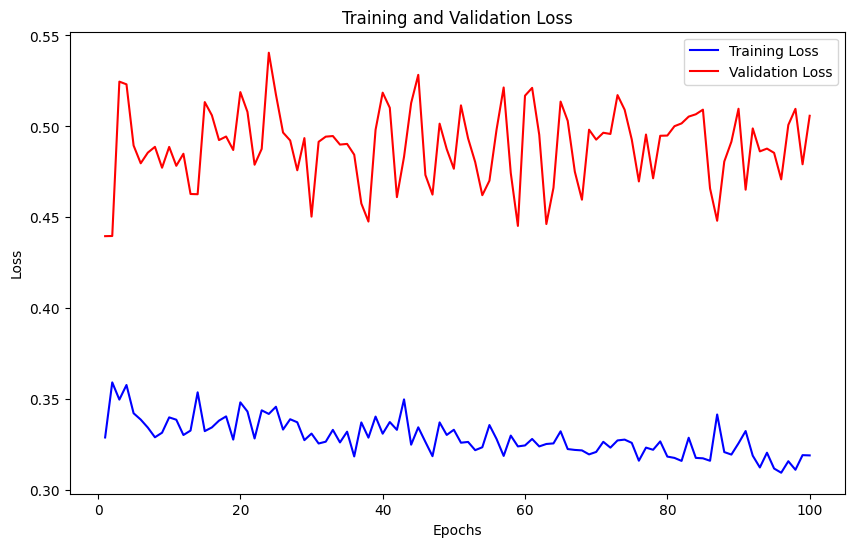

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(epochs1, train_loss1, 'b-', label='Training Loss')
plt.plot(epochs1, val_loss1, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("test loss  :", test_loss)
print("test acc   :", test_accuracy)

1/1 [==============================] - 0s 28ms/step - loss: 0.3676 - accuracy: 0.7742
test loss  : 0.36761578917503357
test acc   : 0.774193525314331


In [ ]:
pred1 = model.predict(x_test)
pred1 = np.argmax(pred1, axis=1)
print(confusion_matrix(y_test, pred1))
print()
print(classification_report(y_test, pred1))

1/1 [==============================] - 0s 20ms/step
[[16  6]
 [ 1  8]]

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        22
           1       0.57      0.89      0.70         9

    accuracy                           0.77        31
   macro avg       0.76      0.81      0.76        31
weighted avg       0.83      0.77      0.78        31



Akurasi, F1, dan loss sudah lumayan baik, namun jika dibandingkan dengan adam optimizer masih kurang.

#Percobaan 2



In [ ]:
model2 = Sequential()

#Input layer
model2.add(Dense(units = 12, activation = 'relu', input_shape = (x_train.shape[1],)))
#Hidden layer
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(units = 256, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(units = 512, activation = 'relu'))
model2.add(Dropout(0.5))
#Output layer
model2.add(Dense(units=2, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 12)                156       
                                                                 
 dense_15 (Dense)            (None, 64)                832       
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               33024     
                                                                 
 dropout_11 (Dropout)        (None, 256)              

In [ ]:
custom_opt = keras.optimizers.experimental.SGD(
          learning_rate=0.0001,
          momentum=0.9,
          weight_decay=None,
          clipnorm=1,
          clipvalue=None,
          global_clipnorm=None,
          use_ema=False,
          ema_momentum=0.99,
          ema_overwrite_frequency=None,
          jit_compile=True,
          name='SGD',
)

In [ ]:
model2.compile(optimizer = custom_opt,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
hist2 = model2.fit(x_train, y_train, epochs = 100, validation_data=(x_val, y_val), batch_size=16)

Epoch 1/100
16/16 [==============================] - 1s 19ms/step - loss: 0.4508 - accuracy: 0.8024 - val_loss: 0.4888 - val_accuracy: 0.6452
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.4501 - accuracy: 0.7984 - val_loss: 0.4883 - val_accuracy: 0.6452
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4558 - accuracy: 0.8065 - val_loss: 0.4934 - val_accuracy: 0.6452
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 0.4494 - accuracy: 0.8105 - val_loss: 0.4925 - val_accuracy: 0.6452
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4437 - accuracy: 0.8226 - val_loss: 0.4914 - val_accuracy: 0.6452
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4285 - accuracy: 0.8105 - val_loss: 0.4930 - val_accuracy: 0.6452
Epoch 7/100
16/16 [==============================] - 0s 10ms/step - loss: 0.4324 - accuracy: 0.8105 - val_loss: 0.4907 - val_accuracy: 0.6452
Epoch 8/10

In [ ]:
hist_dict2 = hist2.history

train_loss2 = hist_dict2['loss']
val_loss2 = hist_dict2['val_loss']
epochs2 = range(1, len(train_loss2)+1)

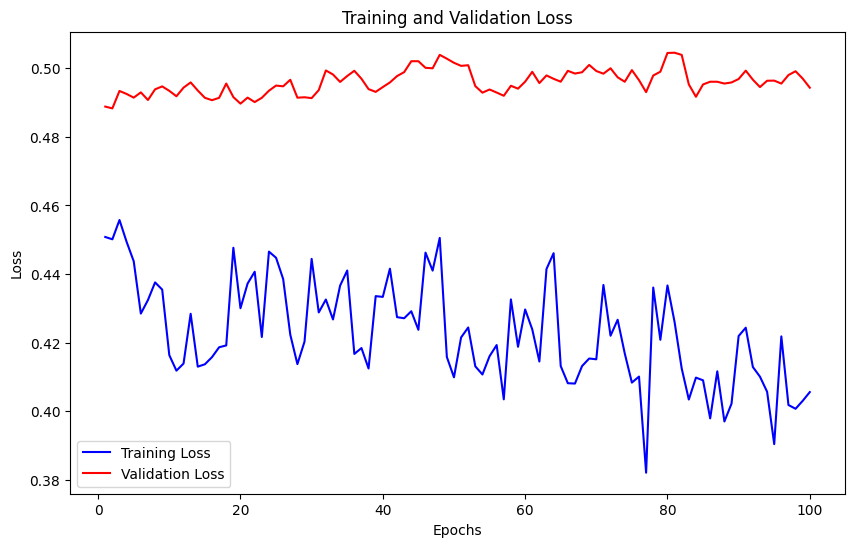

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(epochs2, train_loss2, 'b-', label='Training Loss')
plt.plot(epochs2, val_loss2, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
pred2 = model2.predict(x_test)
pred2 = np.argmax(pred2, axis=1)
print(confusion_matrix(y_test, pred2))
print()
print(classification_report(y_test, pred2))

1/1 [==============================] - 0s 81ms/step
[[16  6]
 [ 3  6]]

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.50      0.67      0.57         9

    accuracy                           0.71        31
   macro avg       0.67      0.70      0.68        31
weighted avg       0.74      0.71      0.72        31



Akurasi, F1, dan loss sudah lumayan baik, namun jika dibandingkan dengan adam optimizer masih kurang.

# Percobaan 3

In [ ]:
model3 = Sequential()

#Input layer
model3.add(Dense(units = 12, activation = 'relu', input_shape = (x_train.shape[1],)))
#Hidden layer
model3.add(Dense(units = 64, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units = 256, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units = 512, activation = 'relu'))
model3.add(Dropout(0.5))
#Output layer
model3.add(Dense(units=2, activation='softmax'))

In [ ]:
custom_opt = keras.optimizers.experimental.SGD(
          learning_rate=0.001,
          momentum=0.5,
          weight_decay=None,
          clipnorm=1,
          clipvalue=None,
          global_clipnorm=None,
          use_ema=False,
          ema_momentum=0.99,
          ema_overwrite_frequency=None,
          jit_compile=True,
          name='SGD',
)

In [ ]:
model3.compile(optimizer = custom_opt,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
hist3 = []

In [ ]:
hist3 = model3.fit(x_train, y_train, epochs = 200, validation_data=(x_val, y_val), batch_size=32)

Epoch 1/200
8/8 [==============================] - 0s 27ms/step - loss: 0.7236 - accuracy: 0.6532 - val_loss: 0.5549 - val_accuracy: 0.6774
Epoch 2/200
8/8 [==============================] - 0s 9ms/step - loss: 0.7434 - accuracy: 0.6371 - val_loss: 0.5575 - val_accuracy: 0.7419
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6805 - accuracy: 0.6694 - val_loss: 0.5626 - val_accuracy: 0.7419
Epoch 4/200
8/8 [==============================] - 0s 9ms/step - loss: 0.8185 - accuracy: 0.5887 - val_loss: 0.5535 - val_accuracy: 0.7419
Epoch 5/200
8/8 [==============================] - 0s 11ms/step - loss: 0.7387 - accuracy: 0.6210 - val_loss: 0.5547 - val_accuracy: 0.7097
Epoch 6/200
8/8 [==============================] - 0s 10ms/step - loss: 0.7740 - accuracy: 0.6048 - val_loss: 0.5551 - val_accuracy: 0.7419
Epoch 7/200
8/8 [==============================] - 0s 10ms/step - loss: 0.7207 - accuracy: 0.6331 - val_loss: 0.5506 - val_accuracy: 0.7419
Epoch 8/200
8/8 [======

In [ ]:
hist_dict3 = hist3.history

train_loss3 = hist_dict3['loss']
val_loss3 = hist_dict3['val_loss']
epochs3 = range(1, len(train_loss3)+1)

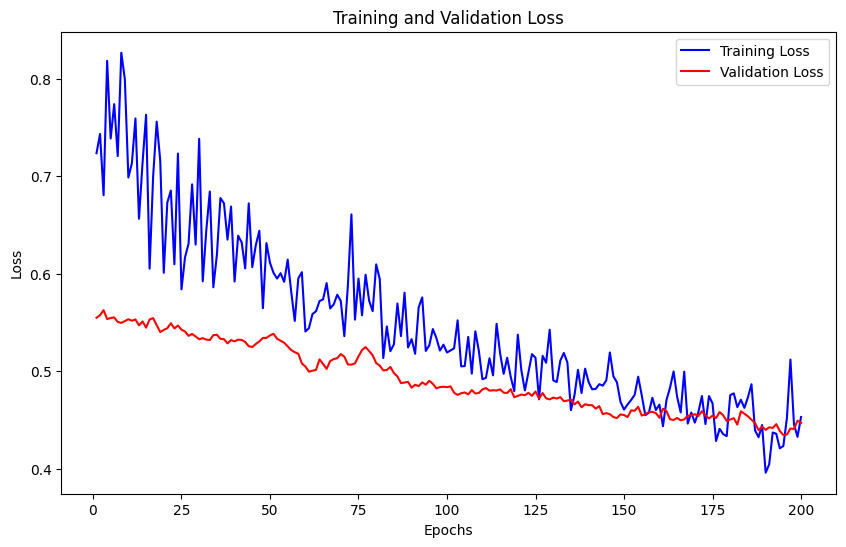

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(epochs3, train_loss3, 'b-', label='Training Loss')
plt.plot(epochs3, val_loss3, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [ ]:
pred3 = model3.predict(x_test)
pred3 = np.argmax(pred3, axis=1)
print(confusion_matrix(y_test, pred3))
print()
print(classification_report(y_test, pred3))

1/1 [==============================] - 0s 132ms/step
[[16  6]
 [ 2  7]]

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        22
           1       0.54      0.78      0.64         9

    accuracy                           0.74        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.79      0.74      0.75        31



Akurasi dan F1 score sudah meningkat dengan mengubah hyperparameter optimizer

# Percobaan 4

In [ ]:
model4 = Sequential()

#Input layer
model4.add(Dense(units = 12, activation = 'relu', input_shape = (x_train.shape[1],)))
#Hidden layer
model4.add(Dense(units = 64, activation = 'relu'))
model4.add(Dropout(0.5))
model4.add(Dense(units = 128, activation = 'relu'))
model4.add(Dropout(0.5))
model4.add(Dense(units = 256, activation = 'relu'))
model4.add(Dropout(0.5))
model4.add(Dense(units = 512, activation = 'relu'))
model4.add(Dropout(0.5))
#Output layer
model4.add(Dense(units=2, activation='softmax'))

In [ ]:
custom_opt = keras.optimizers.experimental.SGD(
          learning_rate=0.001,
          momentum=0.2,
          weight_decay=None,
          clipnorm=1,
          clipvalue=None,
          global_clipnorm=None,
          use_ema=False,
          ema_momentum=0.99,
          ema_overwrite_frequency=None,
          jit_compile=True,
          name='SGD',
)

In [ ]:
model4.compile(optimizer = custom_opt,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )


In [ ]:
hist4 = model4.fit(x_train, y_train, epochs = 100, validation_data=(x_val, y_val), batch_size=32)


Epoch 1/100
8/8 [==============================] - 2s 63ms/step - loss: 4.5563 - accuracy: 0.5484 - val_loss: 1.1571 - val_accuracy: 0.7419
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 3.6153 - accuracy: 0.5806 - val_loss: 1.0989 - val_accuracy: 0.7419
Epoch 3/100
8/8 [==============================] - 0s 15ms/step - loss: 4.4044 - accuracy: 0.5282 - val_loss: 1.0991 - val_accuracy: 0.7419
Epoch 4/100
8/8 [==============================] - 0s 17ms/step - loss: 3.5773 - accuracy: 0.5685 - val_loss: 1.0713 - val_accuracy: 0.7419
Epoch 5/100
8/8 [==============================] - 0s 16ms/step - loss: 4.1838 - accuracy: 0.5565 - val_loss: 1.0557 - val_accuracy: 0.7419
Epoch 6/100
8/8 [==============================] - 0s 17ms/step - loss: 3.6896 - accuracy: 0.5685 - val_loss: 0.9891 - val_accuracy: 0.7419
Epoch 7/100
8/8 [==============================] - 0s 18ms/step - loss: 3.8398 - accuracy: 0.5484 - val_loss: 0.9868 - val_accuracy: 0.7419
Epoch 8/100
8/8 [===

In [ ]:
hist_dict4 = hist4.history

train_loss4 = hist_dict4['loss']
val_loss4 = hist_dict4['val_loss']
epochs4 = range(1, len(train_loss4)+1)

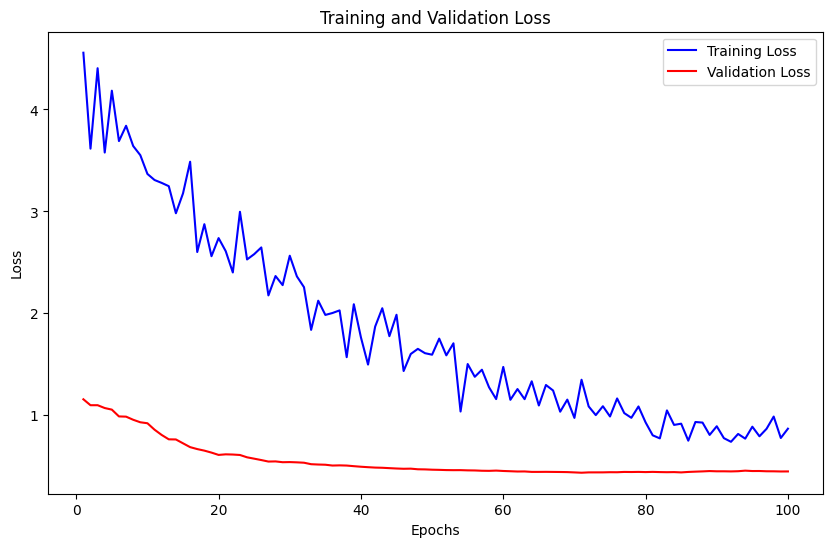

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(epochs4, train_loss4, 'b-', label='Training Loss')
plt.plot(epochs4, val_loss4, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
pred4 = model4.predict(x_test)
pred4 = np.argmax(pred4, axis=1)
print(confusion_matrix(y_test, pred4))
print()
print(classification_report(y_test, pred4))

1/1 [==============================] - 0s 82ms/step
[[19  3]
 [ 6  3]]

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        22
           1       0.50      0.33      0.40         9

    accuracy                           0.71        31
   macro avg       0.63      0.60      0.60        31
weighted avg       0.68      0.71      0.69        31



Akurasi, F1 turun

# Percobaan 5

In [ ]:
model5 = Sequential()

#Input layer
model5.add(Dense(units = 12, activation = 'relu', input_shape = (x_train.shape[1],)))
#Hidden layer
model5.add(Dense(units = 64, activation = 'relu'))
model5.add(Dropout(0.5))
model5.add(Dense(units = 128, activation = 'relu'))
model5.add(Dropout(0.5))
model5.add(Dense(units = 256, activation = 'relu'))
model5.add(Dropout(0.5))
model5.add(Dense(units = 512, activation = 'relu'))
model5.add(Dropout(0.5))
model5.add(Dense(units = 1024, activation = 'relu'))
model5.add(Dense(units = 1024, activation = 'relu'))
model5.add(Dropout(0.5))
#Output layer
model5.add(Dense(units=2, activation='softmax'))

In [ ]:
model5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 12)                156       
                                                                 
 dense_51 (Dense)            (None, 64)                832       
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_52 (Dense)            (None, 128)               8320      
                                                                 
 dropout_33 (Dropout)        (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 256)               33024     
                                                                 
 dropout_34 (Dropout)        (None, 256)             

In [ ]:
custom_opt = keras.optimizers.experimental.SGD(
          learning_rate=0.001,
          momentum=0.9,
          weight_decay=None,
          clipnorm=1,
          clipvalue=None,
          global_clipnorm=None,
          use_ema=False,
          ema_momentum=0.99,
          ema_overwrite_frequency=None,
          jit_compile=True,
          name='SGD',
)

In [ ]:
model5.compile(optimizer = custom_opt,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
hist5 = model5.fit(x_train, y_train, epochs = 200, validation_data=(x_val, y_val), batch_size=32)


Epoch 1/200
8/8 [==============================] - 0s 29ms/step - loss: 3.4435 - accuracy: 0.5403 - val_loss: 0.6877 - val_accuracy: 0.7419
Epoch 2/200
8/8 [==============================] - 0s 29ms/step - loss: 2.3357 - accuracy: 0.5484 - val_loss: 0.6560 - val_accuracy: 0.7097
Epoch 3/200
8/8 [==============================] - 0s 28ms/step - loss: 2.1398 - accuracy: 0.5524 - val_loss: 0.6374 - val_accuracy: 0.7419
Epoch 4/200
8/8 [==============================] - 0s 32ms/step - loss: 1.8435 - accuracy: 0.5766 - val_loss: 0.6102 - val_accuracy: 0.7419
Epoch 5/200
8/8 [==============================] - 0s 31ms/step - loss: 1.8405 - accuracy: 0.5444 - val_loss: 0.6012 - val_accuracy: 0.7419
Epoch 6/200
8/8 [==============================] - 0s 30ms/step - loss: 1.4893 - accuracy: 0.5121 - val_loss: 0.6087 - val_accuracy: 0.7419
Epoch 7/200
8/8 [==============================] - 0s 30ms/step - loss: 1.0599 - accuracy: 0.5927 - val_loss: 0.6157 - val_accuracy: 0.7419
Epoch 8/200
8/8 [===

In [ ]:
hist_dict5 = hist5.history

train_loss5 = hist_dict5['loss']
val_loss5 = hist_dict5['val_loss']
epochs5 = range(1, len(train_loss5)+1)

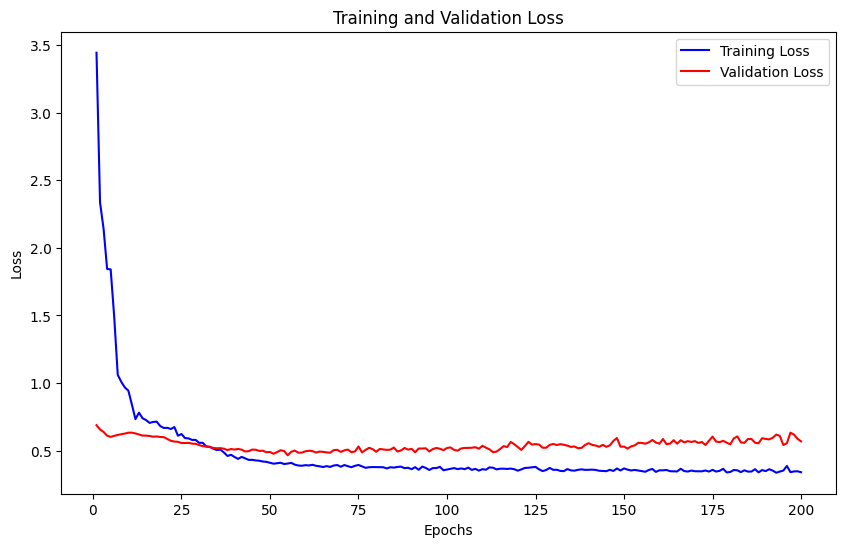

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(epochs5, train_loss5, 'b-', label='Training Loss')
plt.plot(epochs5, val_loss5, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
pred5 = model5.predict(x_test)
pred5 = np.argmax(pred5, axis=1)
print(confusion_matrix(y_test, pred5))
print()
print(classification_report(y_test, pred5))

1/1 [==============================] - 0s 95ms/step
[[16  6]
 [ 0  9]]

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        22
           1       0.60      1.00      0.75         9

    accuracy                           0.81        31
   macro avg       0.80      0.86      0.80        31
weighted avg       0.88      0.81      0.82        31



Akurasi dan F1 score semakin baik, menggunakan hyperparameter paling baik dari percobaan 1-4 dan architecture dengan layer lebih banyak. Model tidak menunjukkan adanya underfitting atau overfitting karena lossnya relatif rendah, dan akurasi serta F1-score baik.

Architecture sudah lebih baik dari benchmark, namun masih belum lebih baik dari Adam Optimizer.

# Conclusion

Benchmark Architecture

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

1/1 [==============================] - 0s 71ms/step
[[18  3]
 [ 5  5]]

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.62      0.50      0.56        10

    accuracy                           0.74        31
   macro avg       0.70      0.68      0.69        31
weighted avg       0.73      0.74      0.73        31



Using custom optimizer and more layers

In [ ]:
pred5 = model5.predict(x_test)
pred5 = np.argmax(pred5, axis=1)
print(confusion_matrix(y_test, pred5))
print()
print(classification_report(y_test, pred5))

1/1 [==============================] - 0s 23ms/step
[[16  6]
 [ 0  9]]

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        22
           1       0.60      1.00      0.75         9

    accuracy                           0.81        31
   macro avg       0.80      0.86      0.80        31
weighted avg       0.88      0.81      0.82        31



Using Adam optimizer and our own architecture

In [ ]:
pred2 = model2.predict(x_test)
pred2 = np.argmax(pred2, axis=1)
print(confusion_matrix(y_test, pred2))
print()
print(classification_report(y_test, pred2))

1/1 [==============================] - 0s 82ms/step
[[15  4]
 [ 1 11]]

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.73      0.92      0.81        12

    accuracy                           0.84        31
   macro avg       0.84      0.85      0.84        31
weighted avg       0.86      0.84      0.84        31

